In [2878]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.stats import gaussian_kde

In [2879]:
df = pd.read_csv('final_asset_classes.csv', index_col=0, parse_dates=True)

In [2880]:
df.head()

FTSE EPRA Nareit Developed Europe TRI  LPX50 Eur TR  \
Date                                                              
2005-10-10                               1.000000      1.000000   
2005-10-11                               1.003231      1.006833   
2005-10-12                               0.999670      0.997110   
2005-10-13                               0.981077      0.986449   
2005-10-14                               0.973370      0.987997   

            MSCI World Net Index EUR  ICE BofA G0BC (Corporate World)  \
Date                                                                    
2005-10-10                  1.000000                         1.000000   
2005-10-11                  1.004578                         0.998658   
2005-10-12                  0.996675                         0.996056   
2005-10-13                  0.997260                         0.993734   
2005-10-14                  0.994278                         0.993174   

            FTSE EMU Government Bond (EGBI) TRI  ICE BofA HW00 (Global HY)  
Date                                                                        
2005-10-10                             1.000000                   1.000000  
2005-10-11                             0.998084                   0.995925  
2005-10-12                             0.996517                   0.991573  
2005-10-13                             0.993465                   0.988179  
2005-10-14                             0.993525                   0.989778

In [2881]:
#change name of columns for better readability

df.columns = ['Real Estate', 'Private Equity', 'Equity', 'IG Corporate Bonds', 'Government Bonds', 'HY Corporate Bonds']

#change order of columns for better readability

df = df[['Equity', 'Private Equity', 'Real Estate', 'IG Corporate Bonds', 'HY Corporate Bonds', 'Government Bonds']]

In [2882]:
df.head()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
Date                                                                    
2005-10-10  1.000000        1.000000     1.000000            1.000000   
2005-10-11  1.004578        1.006833     1.003231            0.998658   
2005-10-12  0.996675        0.997110     0.999670            0.996056   
2005-10-13  0.997260        0.986449     0.981077            0.993734   
2005-10-14  0.994278        0.987997     0.973370            0.993174   

            HY Corporate Bonds  Government Bonds  
Date                                              
2005-10-10            1.000000          1.000000  
2005-10-11            0.995925          0.998084  
2005-10-12            0.991573          0.996517  
2005-10-13            0.988179          0.993465  
2005-10-14            0.989778          0.993525

In [2883]:
#count the number of missing values in each column
df.isnull().sum()

Equity                  6
Private Equity          0
Real Estate            42
IG Corporate Bonds    118
HY Corporate Bonds    118
Government Bonds       29
dtype: int64

In [2884]:
#find the first nan for each column
df.isnull().idxmax()

Equity               2006-12-25
Private Equity       2005-10-10
Real Estate          2006-12-25
IG Corporate Bonds   2005-11-24
HY Corporate Bonds   2005-11-24
Government Bonds     2005-12-26
dtype: datetime64[ns]

In [2885]:
fig = go.Figure()

for column in df.columns:
    fig.add_trace(go.Scatter(
        x=df.index, y=df[column],
        mode='lines',
        name=column,
        line=dict(width=1)
    ))

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Assets",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="black"
    )
)

fig.show()

In [2886]:
fig = go.Figure()

for column in df.columns:
    fig.add_trace(go.Scatter(
        x=df.index, y=df[column],
        mode='lines',
        name=column,
        line=dict(width=1.4)
    ))

fig.update_layout(
    title=dict(
        font=dict(size=24, family="Times New Roman", color="black")  
    ),
    xaxis=dict(
        title="Date", 
        title_font=dict(size=14, family="Times New Roman", color="black"),
        tickfont=dict(size=12, family="Times New Roman"),
        #showgrid=True,  # Enable grid for x-axis
        #gridcolor="grey",  # White grid lines for contrast
        #gridwidth=1
    ),
    yaxis=dict(
        title="Normalized Price", 
        title_font=dict(size=14, family="Times New Roman", color="black"),
        tickfont=dict(size=12, family="Times New Roman"),
        #showgrid=True,  # Enable grid for y-axis
        #gridcolor="lightgrey",  # White grid lines for contrast
        #gridwidth=1
    ),
    legend=dict(
        title="", 
        font=dict(size=18, family="Times New Roman"),
        orientation="h", 
        yanchor="bottom", 
        y=1.02
    ),
    font=dict(
        family="Times New Roman", 
        size=20, 
        color="black"
    ),
    margin=dict(l=50, r=30, t=80, b=50),
    #template="plotly_dark"  
)

fig.show()

Todo: 
- Remove Real estate jump in 06

In [2887]:
df.describe()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
count  4947.000000     4953.000000  4911.000000         4835.000000   
mean      2.044073        1.715317     1.413502            1.530797   
std       1.101240        1.050418     0.460602            0.337781   
min       0.590273        0.243334     0.392264            0.953265   
25%       1.107034        0.952030     1.014953            1.249475   
50%       1.818319        1.398003     1.494665            1.582419   
75%       2.686537        2.069875     1.751700            1.794772   
max       5.140378        5.093917     2.416112            2.081608   

       HY Corporate Bonds  Government Bonds  
count         4835.000000       4924.000000  
mean             2.081046          1.411844  
std              0.701995          0.267146  
min              0.761075          0.965870  
25%              1.461937          1.165285  
50%              2.115974          1.477980  
75%              2.712817          1.620834  
max              3.323006          1.842570

## Now Plotting Dsitrbutions For Daily Returns

Each asset done separately

In [2888]:
#daily_returns = df.pct_change(fill_method=None).dropna() 

#df = df.fillna(method='ffill').fillna(method='bfill') # forward or backward filling 

df = df.apply(lambda x: x.interpolate() if x.isna().sum() > 0 else x)


daily_returns = df.pct_change().dropna()

In [2889]:
daily_returns.head()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
Date                                                                    
2005-10-11  0.004578        0.006833     0.003231           -0.001342   
2005-10-12 -0.007867       -0.009657    -0.003550           -0.002606   
2005-10-13  0.000588       -0.010692    -0.018599           -0.002331   
2005-10-14 -0.002991        0.001569    -0.007856           -0.000564   
2005-10-17  0.003290        0.000492    -0.003613            0.000458   

            HY Corporate Bonds  Government Bonds  
Date                                              
2005-10-11           -0.004075         -0.001916  
2005-10-12           -0.004370         -0.001570  
2005-10-13           -0.003423         -0.003062  
2005-10-14            0.001618          0.000060  
2005-10-17            0.005447         -0.000227

In [2890]:
daily_returns.describe()

Equity  Private Equity  Real Estate  IG Corporate Bonds  \
count  4952.000000     4952.000000  4952.000000         4952.000000   
mean      0.000380        0.000417     0.000230            0.000140   
std       0.009958        0.013231     0.015729            0.002439   
min      -0.100676       -0.128207    -0.330296           -0.031052   
25%      -0.003882       -0.004916    -0.005898           -0.001123   
50%       0.000744        0.000933     0.000347            0.000253   
75%       0.005240        0.006668     0.006806            0.001520   
max       0.088746        0.127987     0.507261            0.016284   

       HY Corporate Bonds  Government Bonds  
count         4952.000000       4952.000000  
mean             0.000247          0.000094  
std              0.003068          0.002910  
min             -0.047106         -0.016023  
25%             -0.000590         -0.001399  
50%              0.000423          0.000151  
75%              0.001263          0.001572  
max              0.028941          0.020704

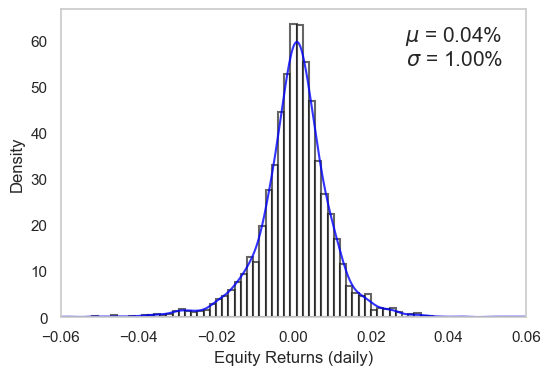

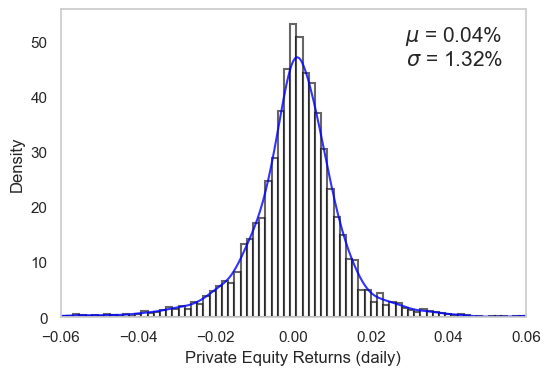

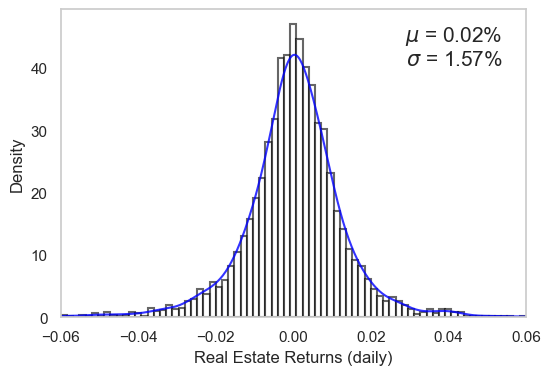

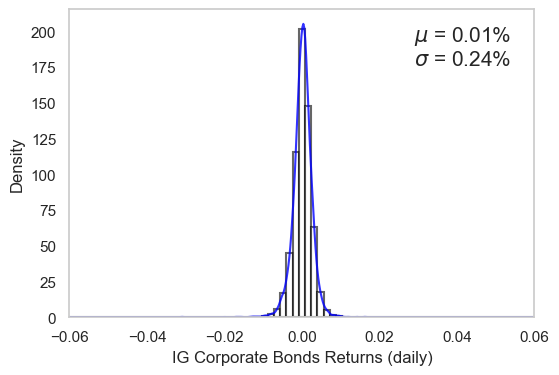

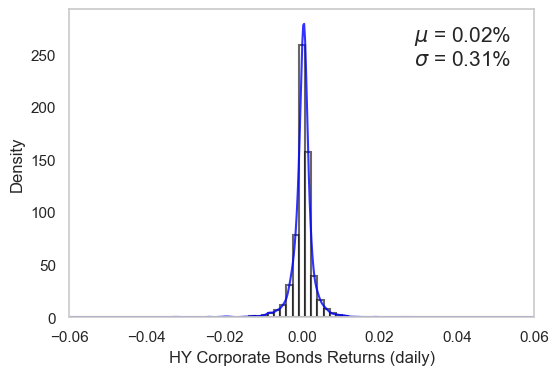

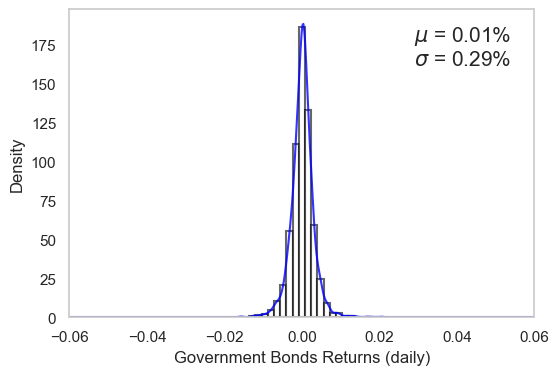

In [ ]:
x_min = -0.06
x_max = 0.06
num_bins = 75
bin_edges = np.linspace(x_min, x_max, num_bins + 1)

for column in daily_returns.columns:
    data = daily_returns[column].dropna()
    
    fig, ax = plt.subplots(figsize=(6, 4))  
    
    ax.hist(
        data,
        bins=bin_edges,
        color='white',
        alpha=0.6,
        density=True,
        edgecolor='black',
        linewidth=1.5
    )
    
    # Add KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(x_min, x_max, 500)
    ax.plot(x_vals, kde(x_vals), color='blue', linewidth=1.5, label='KDE', alpha=0.8) #linestyle='--'

    
    mu = data.mean() * 100
    sigma = data.std() * 100
    
    ax.text(
        0.95, 0.95,  
        f"$\mu$ = {mu:.2f}%\n$\sigma$ = {sigma:.2f}%",
        transform=ax.transAxes,
        fontsize=15,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white", alpha=0.7)
    )
    
    #ax.set_title(f'Distribution of Daily Returns for {column}')
    ax.set_xlabel(f'{column} Returns (daily)') # remove for final edit in overleaf
    ax.set_ylabel('Density')
    ax.grid(False)
    ax.set_xlim(x_min, x_max)
    
    plt.show()  


ToDo:
- Make the colour of the KDE the same as in the performance plot for each class, improving readability. 

In [2892]:
fig = go.Figure()

for i, column in enumerate(daily_returns.columns):
    fig.add_trace(go.Histogram(
        x=daily_returns[column].dropna(),
        xbins=dict(
            start=x_min,
            end=x_max,
            size=(x_max - x_min) / num_bins  # Fixed bin size for consistency
        ),
        marker_color=px.colors.qualitative.Plotly[i],
        opacity=0.5,
        name=column,
        histnorm='probability density',
        nbinsx=100
    ))

# Update layout for better presentation
fig.update_layout(
    title="Distribution of Daily Returns for All Assets",
    xaxis_title="Daily Return",
    yaxis_title="Density",
    barmode='overlay',  # Overlay all histograms
    xaxis=dict(range=[x_min, x_max]),
    legend_title="Assets"
)

fig.show()

## Correlation Matrix

In [2893]:
correlation_matrix = daily_returns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.where(~mask)

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_masked.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    colorbar_title="Correlation",
    zmin=-1, zmax=1,
    text=np.round(correlation_matrix_masked.values, 2),
    hovertemplate="%{text}",
))
fig.update_layout(
    title="Lower Triangular Correlation Matrix of Daily Returns",
    xaxis=dict(tickangle=45),
    yaxis=dict(autorange="reversed"),
    #template="plotly_dark"
)

fig.show()

### Descriptive stats


In [2894]:
summary_stats = pd.DataFrame({
    "Min": daily_returns.min(),
    "Max": daily_returns.max(),
    "Mean": daily_returns.mean(),
    "S.D.": daily_returns.std(),
    "Skewness": daily_returns.skew(),
    "Kurtosis": daily_returns.kurtosis()
})

# Round the results for easier reading
summary_stats = summary_stats.round(4)

# Display the results
summary_stats

Min     Max    Mean    S.D.  Skewness  Kurtosis
Equity             -0.1007  0.0887  0.0004  0.0100   -0.4827   10.6258
Private Equity     -0.1282  0.1280  0.0004  0.0132   -0.5260   10.1837
Real Estate        -0.3303  0.5073  0.0002  0.0157    4.7241  259.2245
IG Corporate Bonds -0.0311  0.0163  0.0001  0.0024   -0.8398    9.3371
HY Corporate Bonds -0.0471  0.0289  0.0002  0.0031   -2.1660   34.6968
Government Bonds   -0.0160  0.0207  0.0001  0.0029    0.1559    4.4670